In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

script_csv = pd.read_csv(r"C:\Users\Christopher\Desktop\Python\Notebooks\Datasets\GOT Markov Project\got_scripts_breakdown.csv")

C:\Users\Christopher\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


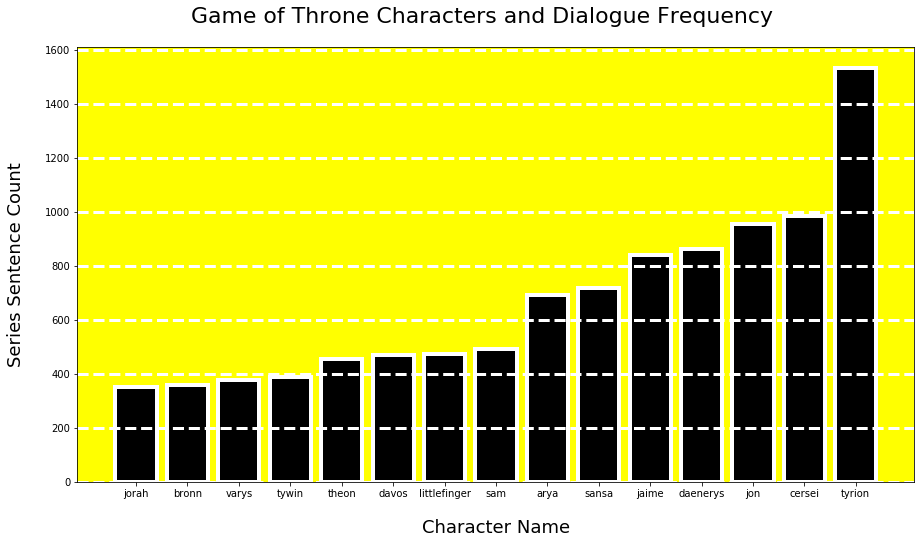

In [45]:
relev_char = script_csv["Name"].value_counts()[0:15] #getting the top 15 characters in terms of number of sentences spoken
                                                     #in the GOT series

#Visualizing this series
plt.figure(figsize = [15,8])
plt.bar(relev_char.index[::-1], relev_char.values[::-1], color = "black", edgecolor = "white", linewidth = 4)
plt.xlabel("Character Name", labelpad = 20, size = 18)
plt.ylabel("Series Sentence Count", labelpad= 20, size = 18)
plt.suptitle("Game of Throne Characters and Dialogue Frequency", size = 22, y = .95)
plt.grid(color = "white", linewidth = 3, linestyle = "--", axis = "y")
plt.axes().set_facecolor("yellow")
plt.show()

In [46]:
#a function that flattens out any characters script
def get_words(sentences_list):
    sentences = [sentence for sentence in sentences_list] #combines all of the sentences into a list
    words_list = [word.split(" ") for word in sentences] #combines all of the words into lists
    words_flat = [word for sublist in words_list for word in sublist] #flattens out all of the word sublists
    return words_flat

In [47]:
sentences = ["this is a sentence", "again a sentence", "hmm another one"]
words = get_words(yes)

In [48]:
from collections import defaultdict

#creates a defaultdict containing all the possibilities current state (curent word) to next state (next word)
def markov_chain(text): 
    
    m_dict = defaultdict(list)
    for current_word, next_word in zip(text[0:-1],text[1:]):
        m_dict[current_word].append(next_word)
        
    m_dict = dict(m_dict)
    return m_dict

In [49]:
words_dict = markov_chain(words)
words_dict

{'this': ['is'],
 'is': ['a'],
 'a': ['sentence', 'sentence'],
 'sentence': ['again', 'hmm'],
 'again': ['a'],
 'hmm': ['another'],
 'another': ['one']}

In [50]:
import random

#generates a sentence based on the defaultdict markov chain
def generate_sentence(chain, num_words): 
    count = random.randrange(0,num_words+1) #generates a random amount of words in the sentence (somewhere between 0 and 20)
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()
    
    for i in range(count - 1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence = sentence + " " + word2
        
    sentence = sentence + "."
    return(sentence)

In [51]:
new_sentence = generate_sentence(words_dict, 5)
new_sentence

'Again a sentence again a.'

In [52]:
#Generates a dictionary for the top n characters and stores in a list
def create_dicts(top_chars):
    char_dicts = []
    relev_char = script_csv["Name"].value_counts()[0:top_chars].index #gets list of top characters given the range
    for i in range(top_chars):
        char_df = script_csv[script_csv["Name"] == relev_char[i]]
        char_script = char_df["Sentence"]
        words_flat = get_words(char_script)
        char_dict = markov_chain(words_flat)
        char_dicts.append(char_dict)
    return char_dicts

In [53]:
#Generates a script based on n top characters, n lines desired, and n words per line 
def create_scripts(top_chars, num_lines, num_words):
    char_list_of_dicts = create_dicts(top_chars) #creates the character dictionaries based on number n of top characters
    relev_char = script_csv["Name"].value_counts()[0:top_chars] #gets list of top characters given the range
    for i in range(num_lines): 
        char = random.randrange(0, top_chars) #selects a random character from number n of top characters
        char_sentence = generate_sentence(char_list_of_dicts[char], num_words)
        print(relev_char.index[char], ": ", char_sentence)

In [58]:
create_scripts(3,20,12)

jon :  Field of your fight Stannis? Are.
tyrion :  Diplomatic.
jon :  He lived here debating.
cersei :  Loudly.
tyrion :  Become a man without meeting Thats cruel even have.
cersei :  Feel him He will take his whores more painful death Uncle?.
tyrion :  And there.
jon :  Ate with Daenerys Targaryen Get some.
tyrion :  Iced milk and their marks Hold fast Hold fast Hold fast.
jon :  Knights of your prisoner? Im the girls.
jon :  Putting a whore named Ros took the training yard anymore.
jon :  Order But Im.
tyrion :  Nephews behavior I am Tyrion please Your Grace My.
tyrion :  Wildfire and that for? The Wall Leave us Joffrey died?.
tyrion :  Boar Cersei have witnessed gives a moment.
tyrion :  Song? I would want to her A stupid enough while you agree.
tyrion :  Hates.
jon :  Knew and theyre wrapped up with an army of Winterfell You.
cersei :  Carriage at Blackwater do A good at me.
cersei :  Crone came home Im.
